<a href="https://colab.research.google.com/github/Monyque553/machine_learning_project/blob/main/projetoAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn import tree as tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay


# Lendo o Dataset


In [ ]:
df = pd.read_csv('https://github.com/tnpb-1st/projeto-am-2024.1/raw/main/winequality-red.csv', sep=';')

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Análise exploratória dos dados

Nessa etapa, queremos entender a distribuição da classe de interesse. Além de entender as correlações entre variáveis.

**Distribuição das Target Variables**

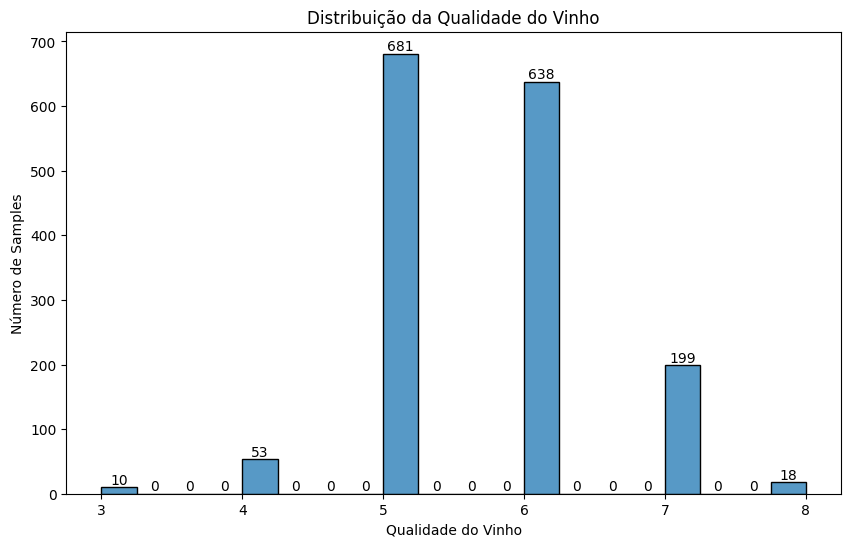

In [ ]:
# Assuming your dataframe is named 'df' and the column is 'quality'
feature_values = df['quality']

# Create histogram using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.histplot(feature_values, bins=20)
plt.title('Distribuição da Qualidade do Vinho')
plt.xlabel('Qualidade do Vinho')
plt.ylabel('Número de Samples')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.show()

**Plotando cada feature com seu índice para ver a distribuição dos seus dados**

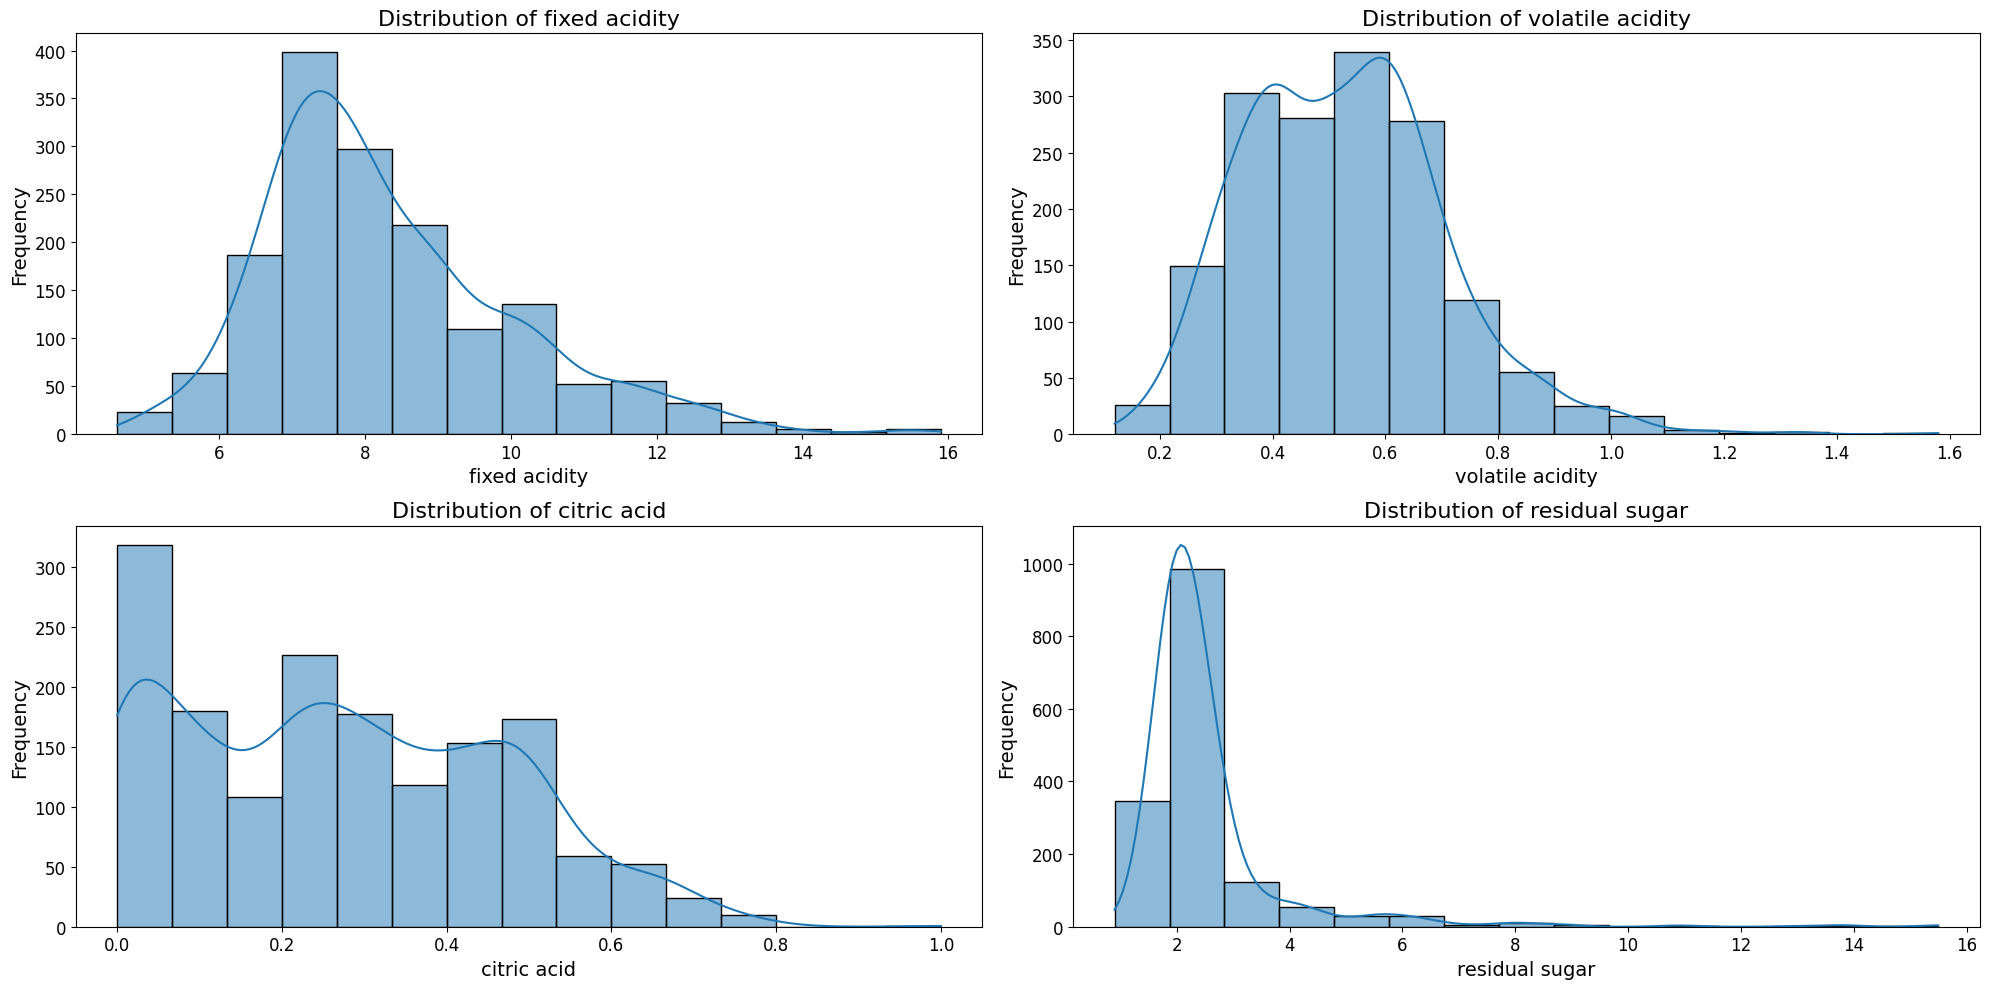

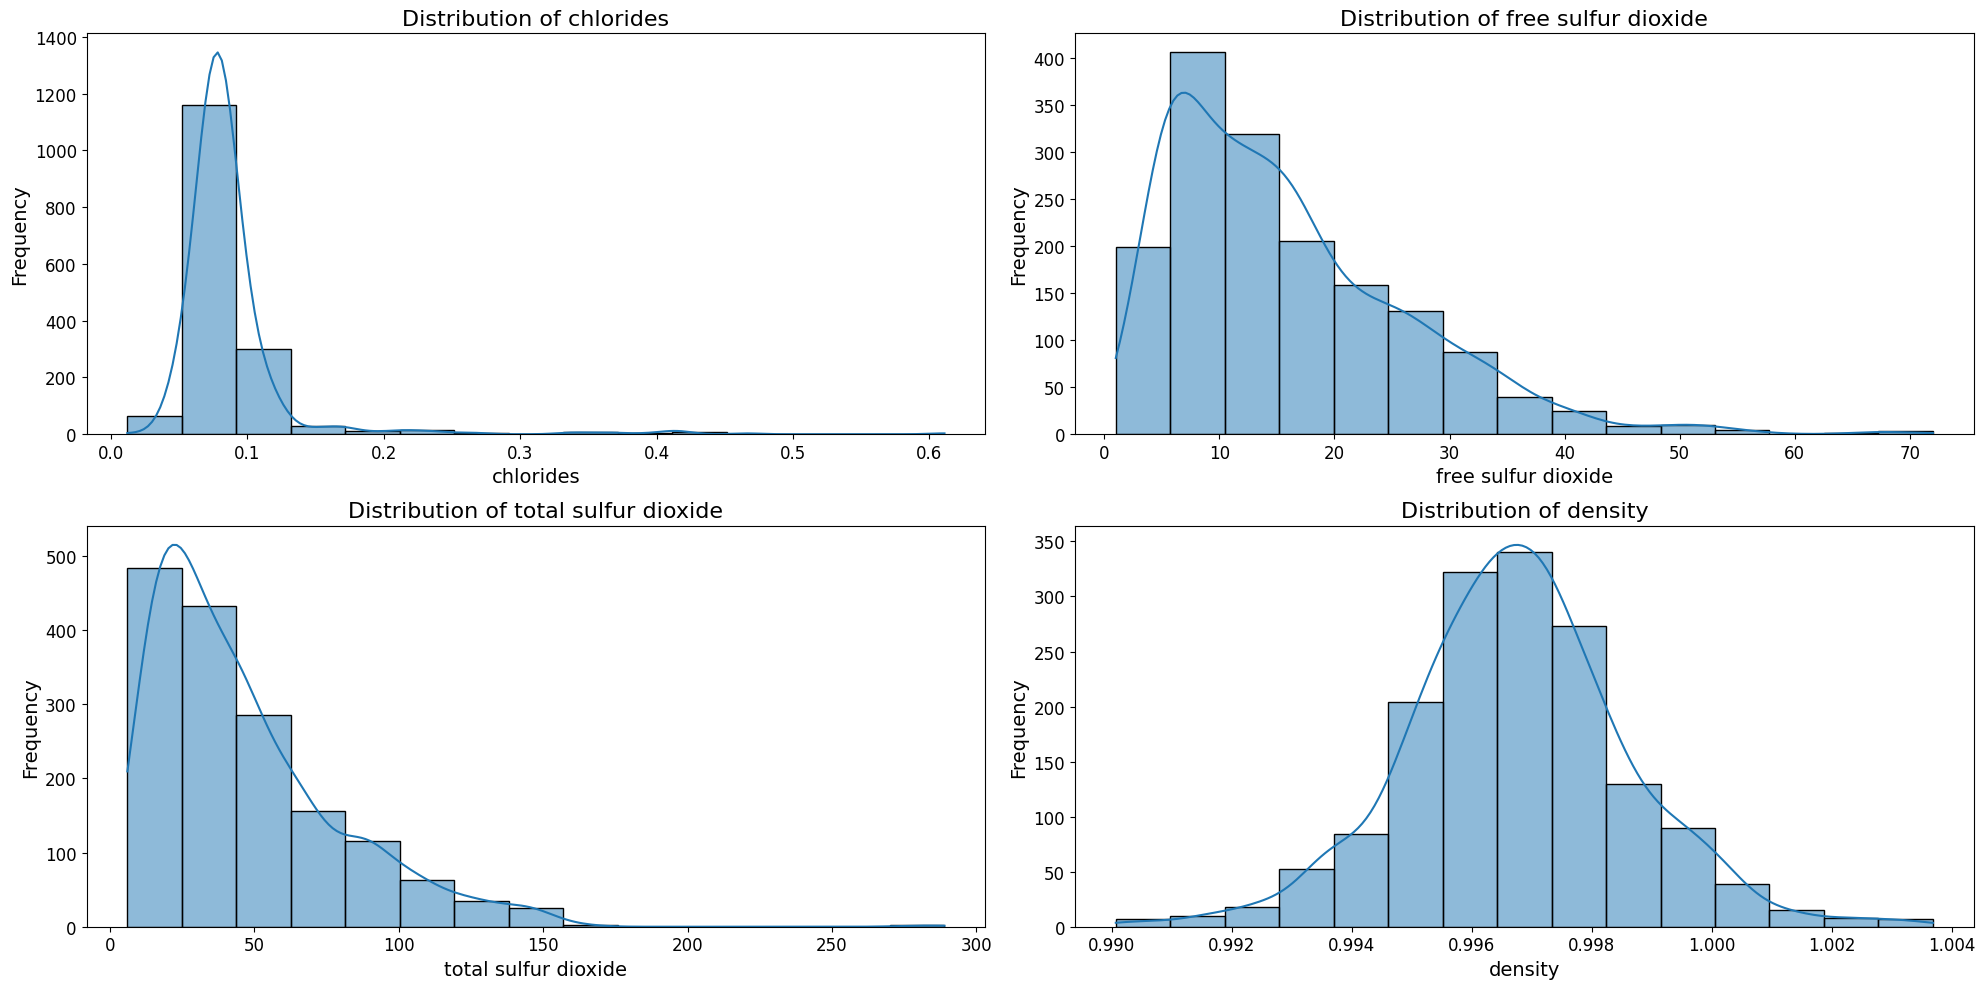

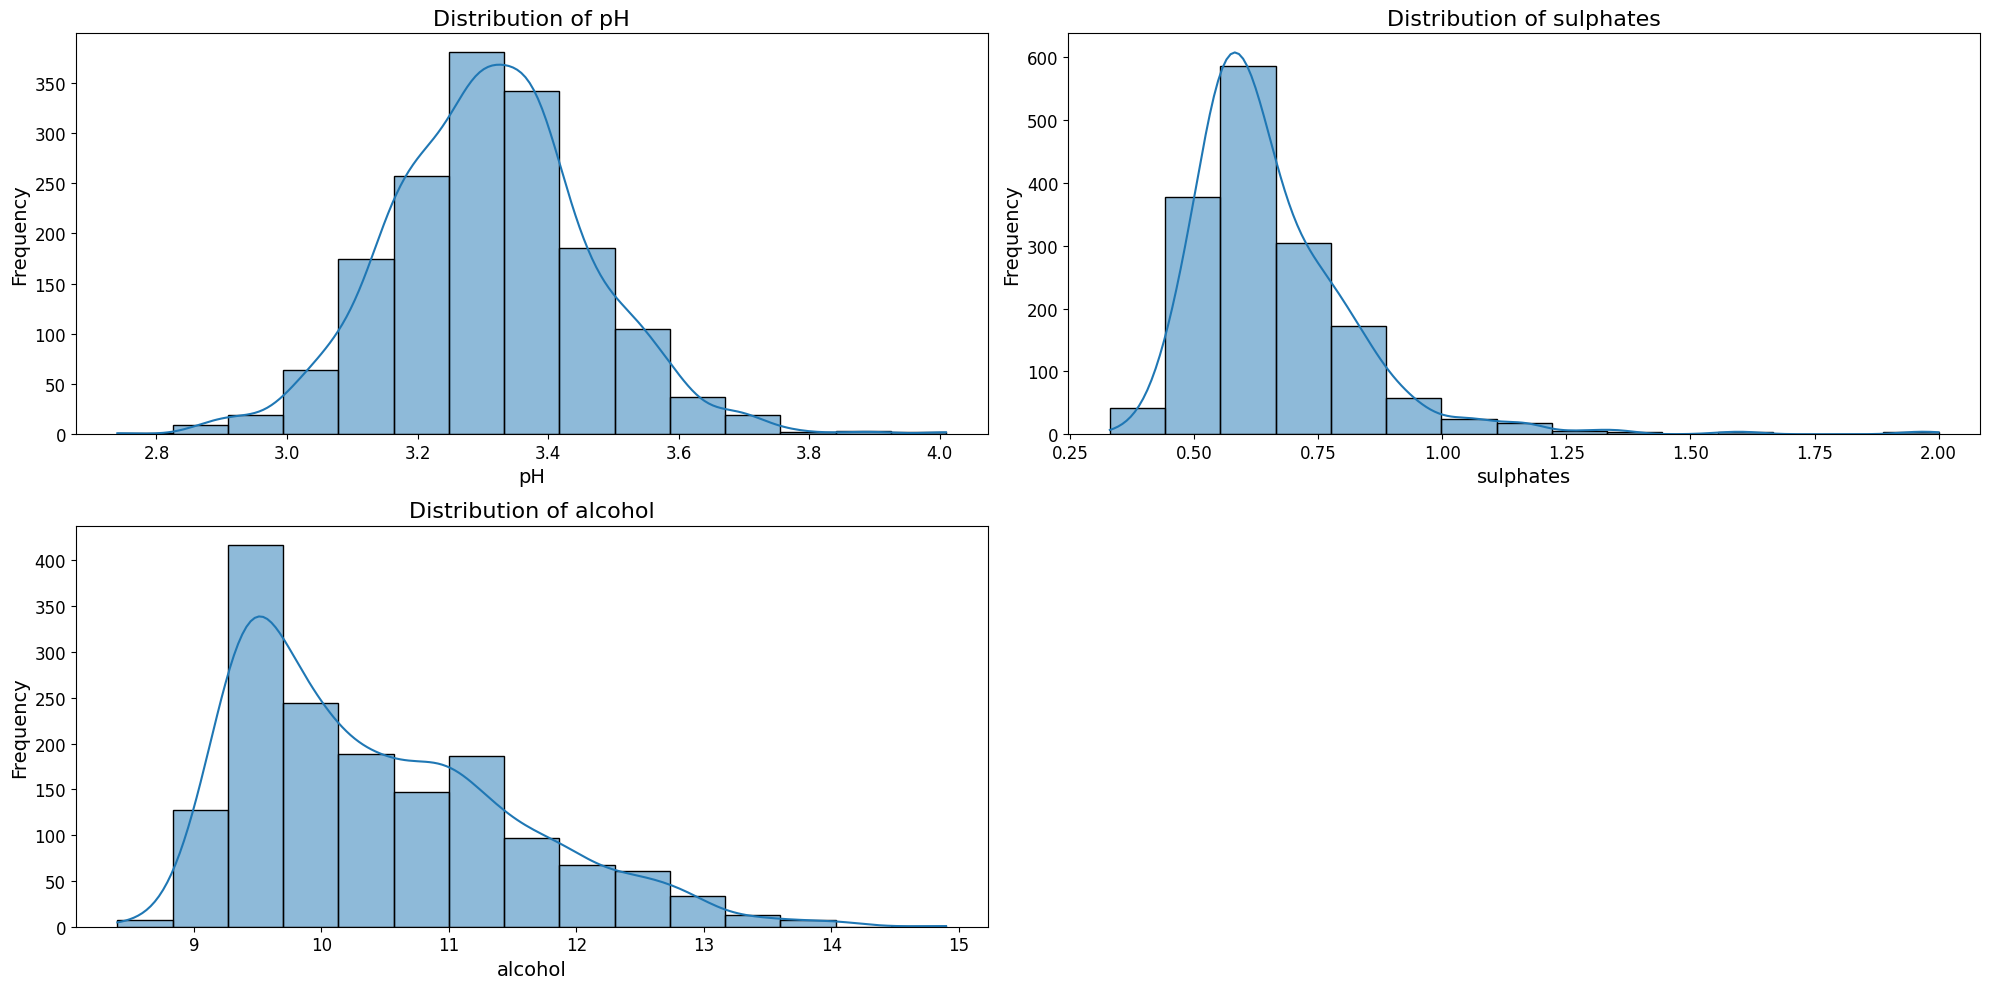

In [ ]:
columns = df.columns[:-1]  # Exclude the 'quality' column for distribution plots

# Group columns in sets of 4
grouped_columns = [columns[i:i+4] for i in range(0, len(columns), 4)]

# Plotting
title_fontsize = 16
label_fontsize = 14
tick_fontsize = 12

# Plotting
for group in grouped_columns:
    plt.figure(figsize=(20, 10))
    for i, column in enumerate(group, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], bins=15, kde=True)
        plt.title(f'Distribution of {column}', fontsize=title_fontsize)
        plt.xlabel(column, fontsize=label_fontsize)
        plt.ylabel('Frequency', fontsize=label_fontsize)
        plt.xticks(fontsize=tick_fontsize)
        plt.yticks(fontsize=tick_fontsize)
    plt.tight_layout()
    plt.show()

**Plot dos gráficos de cada feature com nossa target (wine quality)**

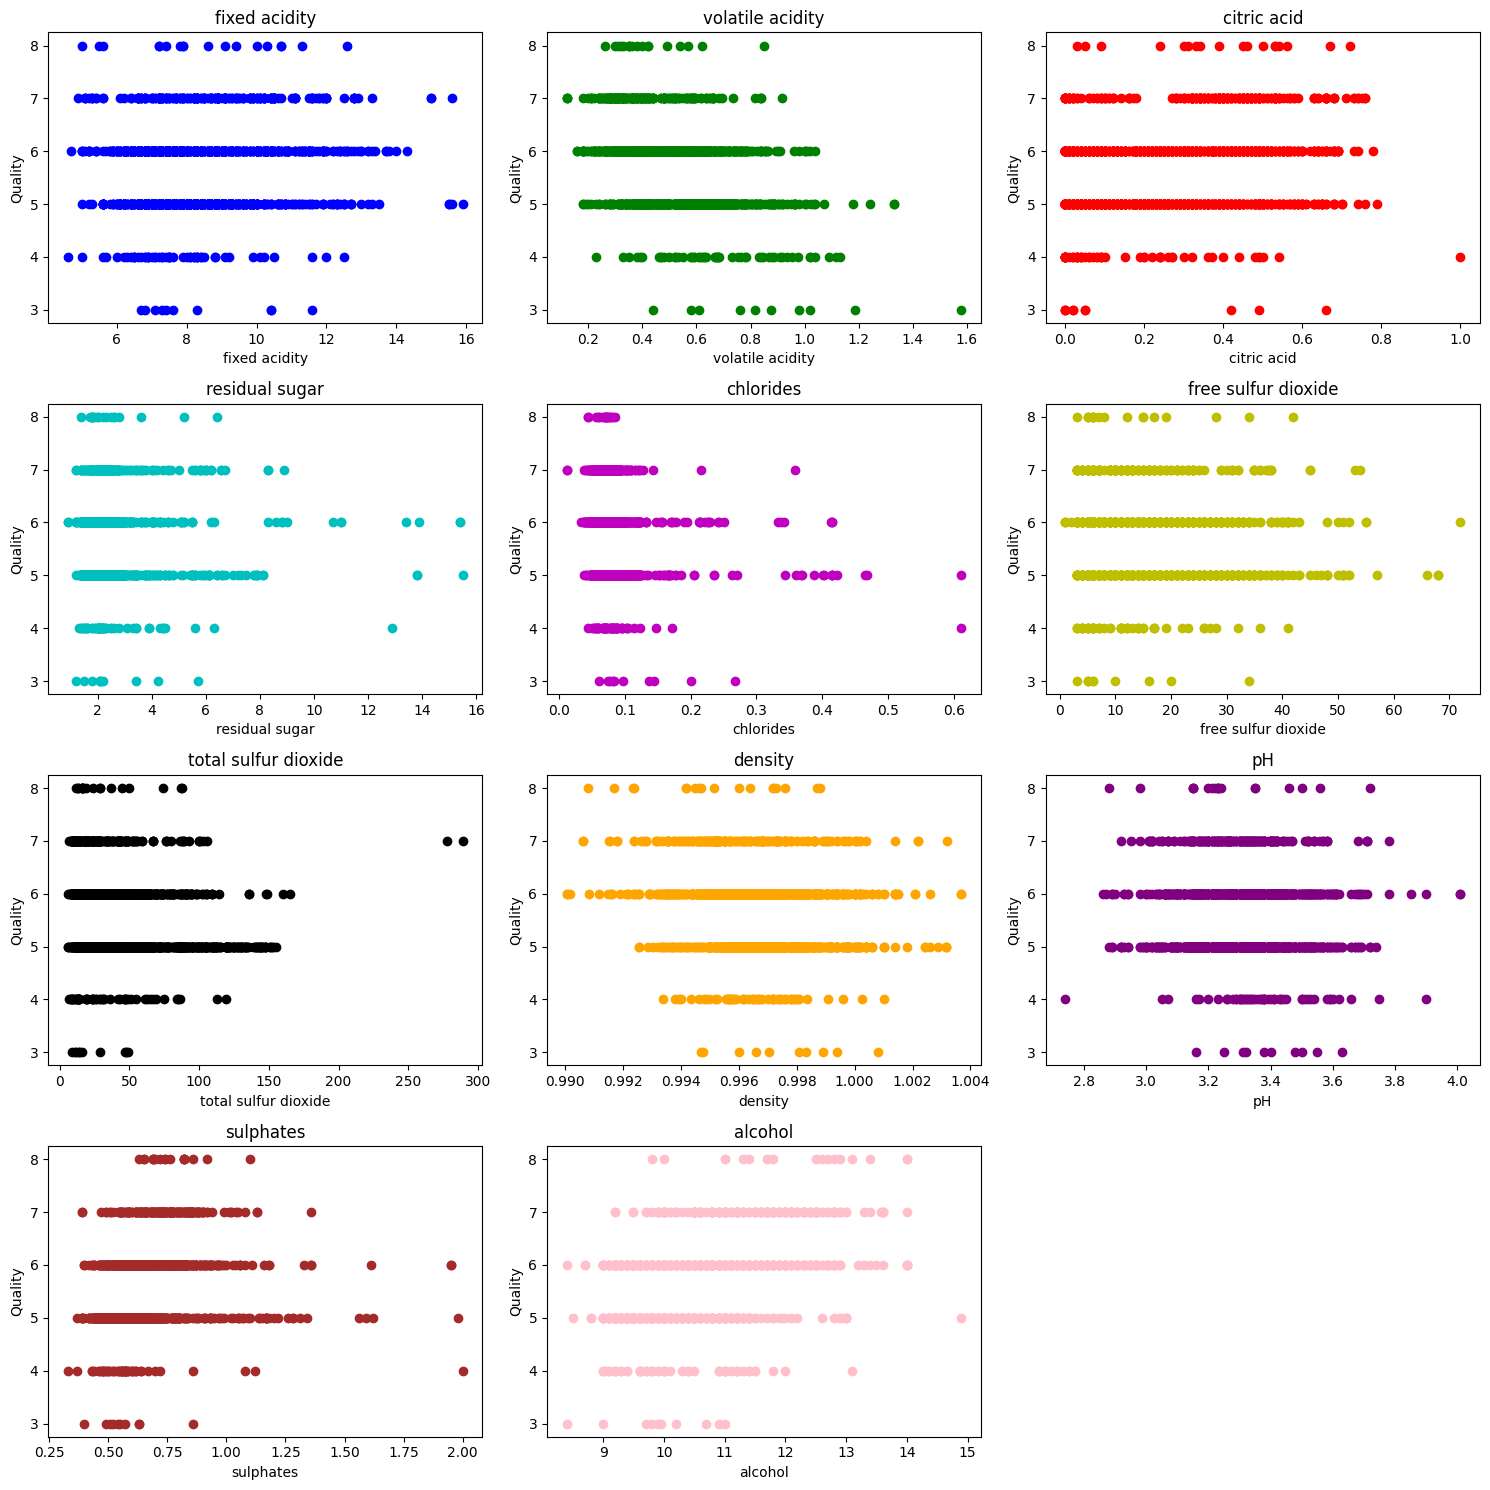

In [ ]:
# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']

# Set up the 4x3 matrix of plots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against wine quality in a separate subplot with different colors
for i, (col, color) in enumerate(zip(df.columns[:-1], colors)):  # Exclude the 'quality' column
    axes[i].scatter(df[col], df['quality'], color=color)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Quality')

# Remove any empty subplots (in case there are fewer than 12 features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
correlations = df.corr()['quality'][:-1]  # Exclude the 'quality' column itself

# Create a DataFrame for the correlations to use with Plotly
correlation_df = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values,
    'Color': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff1493']
})
correlation_df = correlation_df.sort_values(by='Correlation')
# Create the bar plot using Plotly
fig = px.bar(correlation_df, x='Feature', y='Correlation', color='Feature',
             color_discrete_sequence=correlation_df['Color'],
             title='Pearson Correlation between Wine Quality and Features')

# Show the plot
fig.show()

In [ ]:
spearman_correlations = df.corr(method='spearman')['quality'][:-1]  # Exclude the 'quality' column itself

# Define a list of hex colors for each feature
hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff1493']

# Create a DataFrame for the correlations to use with Plotly
spearman_correlation_df = pd.DataFrame({
    'Feature': spearman_correlations.index,
    'Spearman Correlation': spearman_correlations.values,
    'Color': hex_colors
})
spearman_correlation_df = spearman_correlation_df.sort_values(by='Spearman Correlation')
# Create the bar plot using Plotly
fig = px.bar(spearman_correlation_df, x='Feature', y='Spearman Correlation', color='Feature',
             color_discrete_sequence=spearman_correlation_df['Color'],
             title='Spearman Correlation between Wine Quality and Features')

# Show the plot
fig.show()

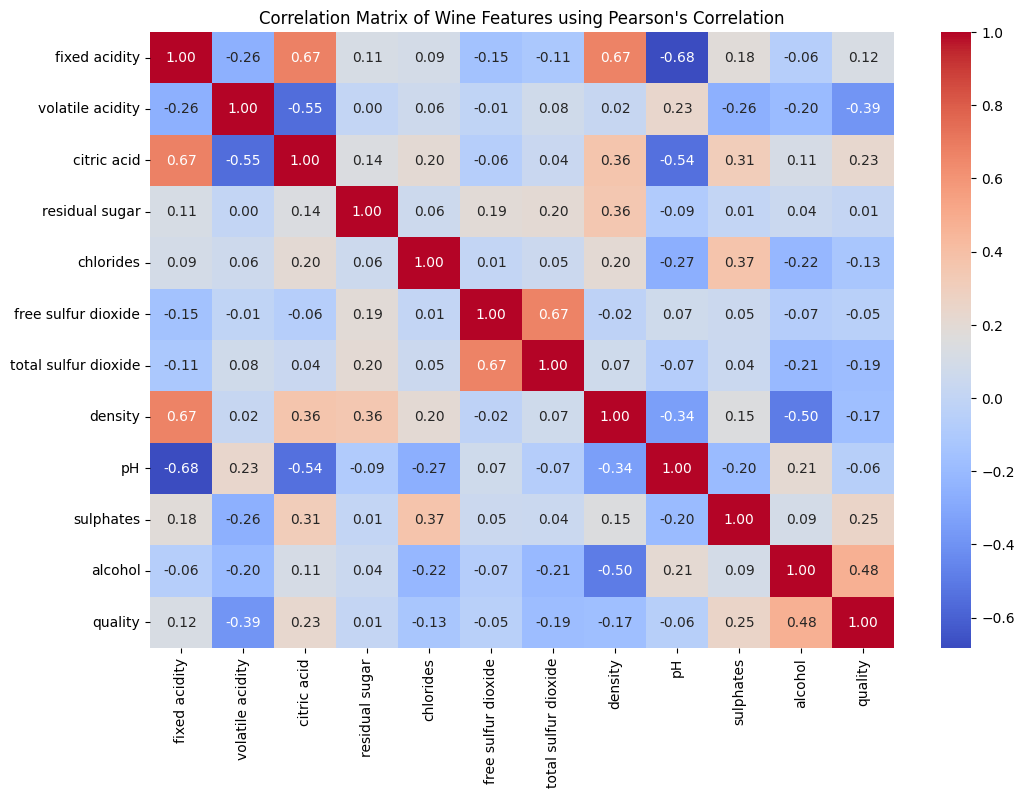

In [ ]:
# Calculate the correlations between features
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features using Pearson\'s Correlation')
plt.show()


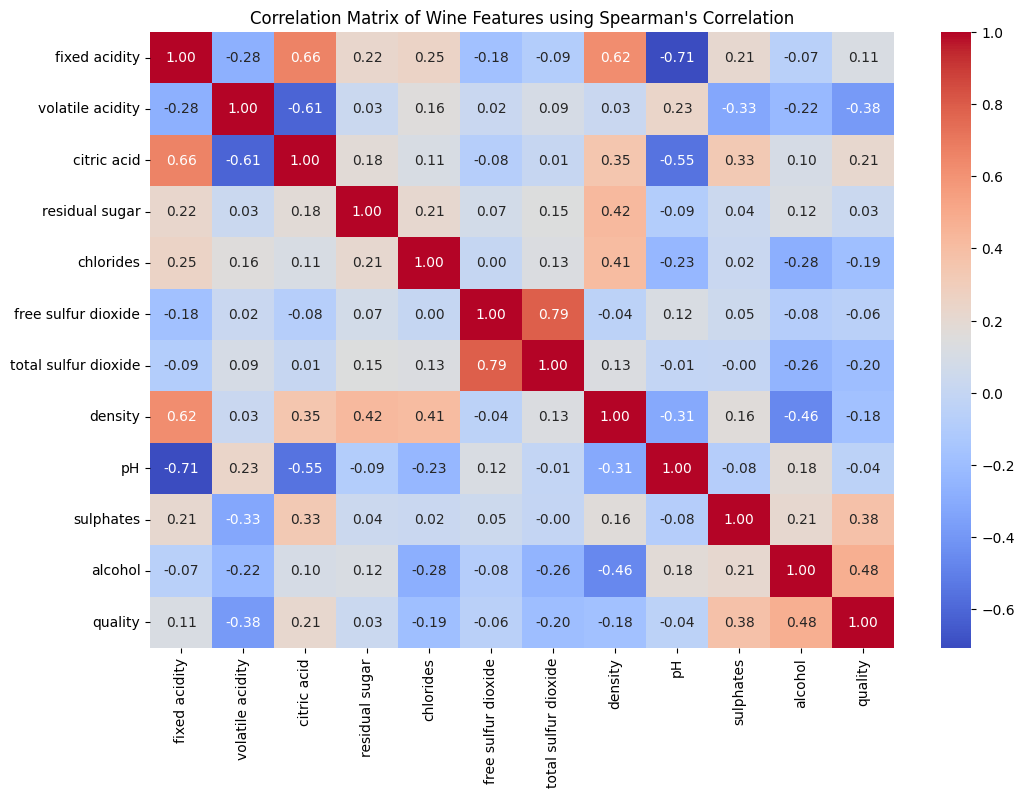

In [ ]:
# Calculate the correlations between features
correlation_matrix = df.corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features using Spearman\'s Correlation')
plt.show()


## Modificando o Dataset (criando as versões normalizadas e escalada)

In [ ]:
minmax_scaler = MinMaxScaler() # padronizar
pt = PowerTransformer(method='yeo-johnson') # normalizar

In [ ]:
df_original = df.copy()
df_scaled = df.copy()
df_scaled[df_scaled.columns[:-1]] = minmax_scaler.fit_transform(df_scaled[df_scaled.columns[:-1]])
df_normalized = df.copy()
df_normalized[df_normalized.columns[:-1]] = pt.fit_transform(df_normalized[df_normalized.columns[:-1]])
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,5
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,5
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,6
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5


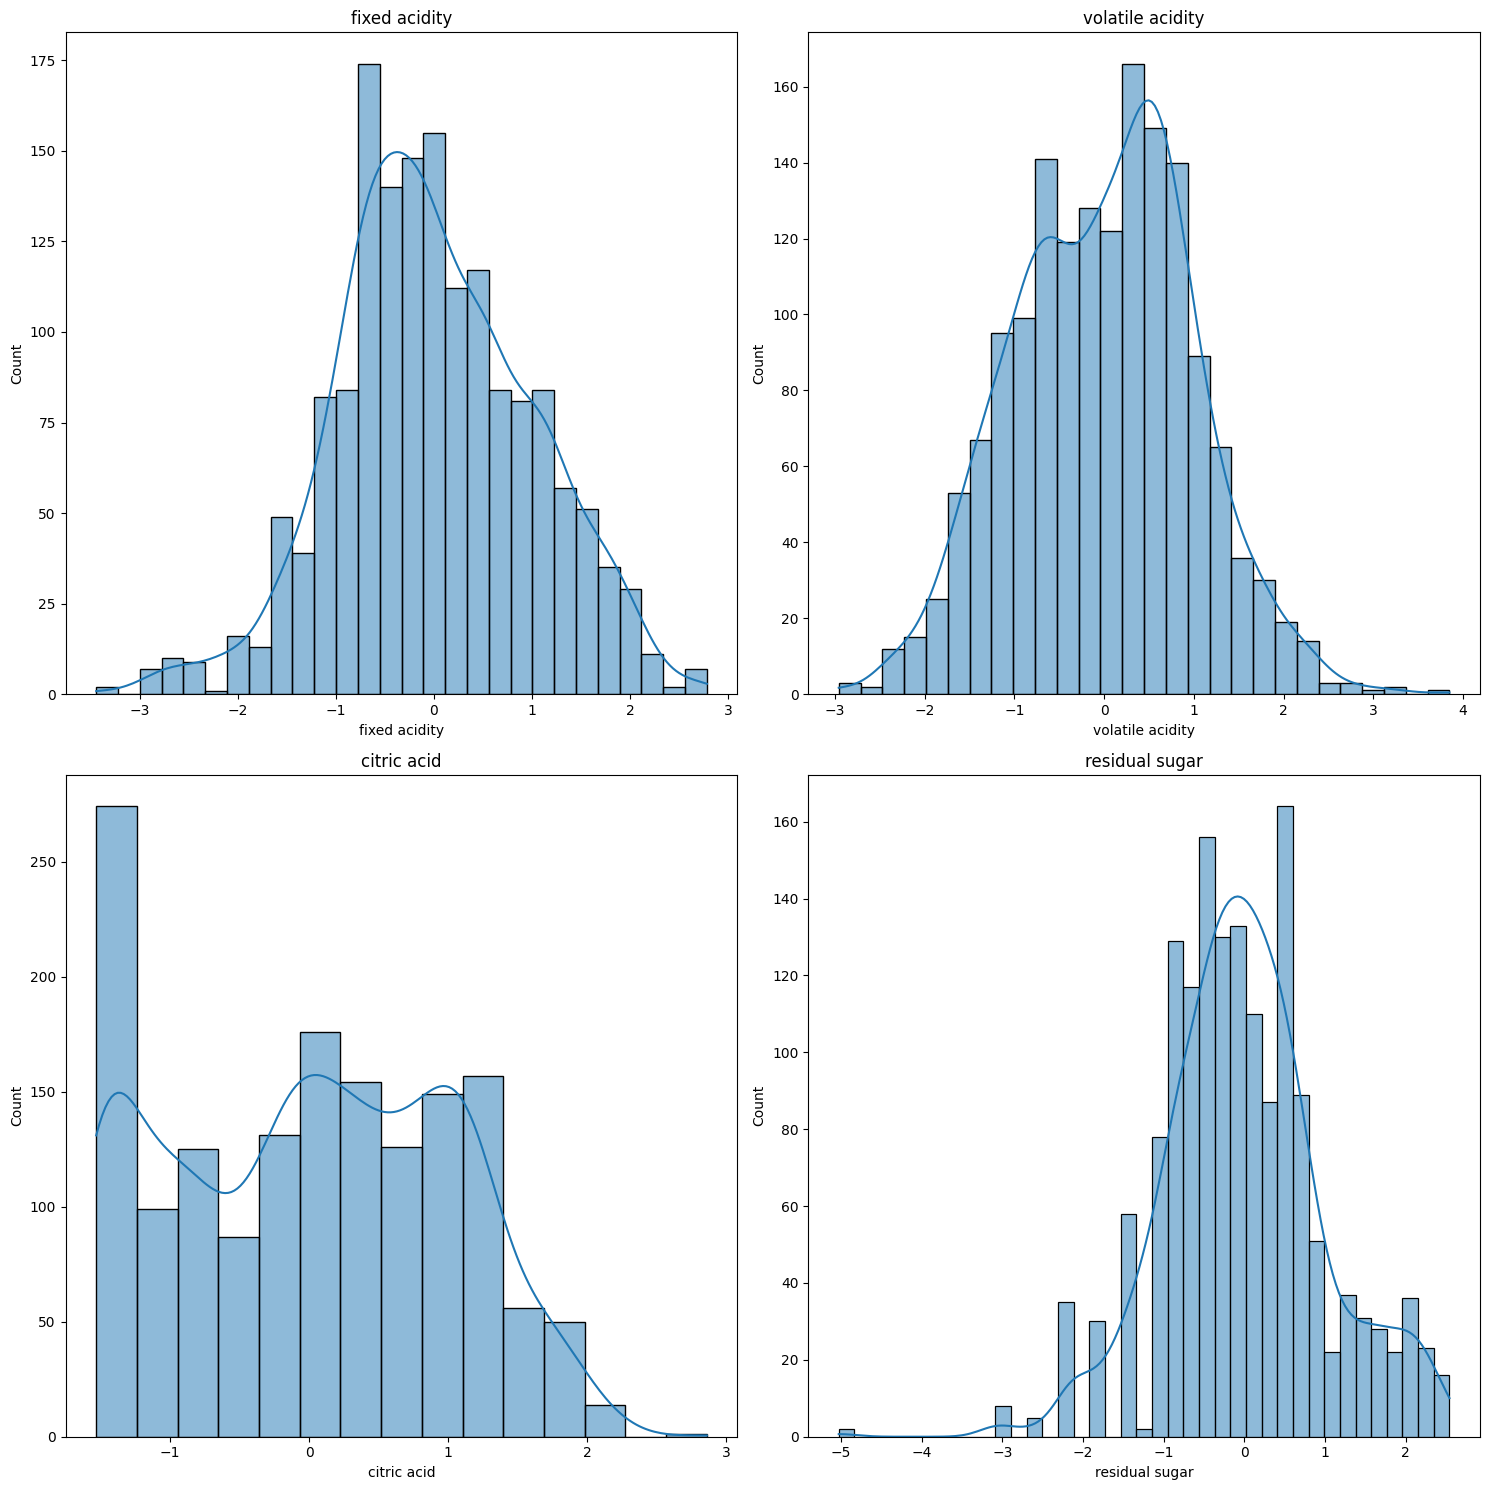

In [ ]:
# Define a grid de gráficos de 4 linhas por 3 colunas
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Lista de colunas a serem plotadas (excluindo a coluna 'quality')
columns = df_normalized.columns[:-1]

# Itera sobre as colunas e os eixos da grid para plotar cada gráfico
for ax, col in zip(axes.flatten(), columns[:4]):
    sns.histplot(df_normalized[col], kde=True, ax=ax)
    ax.set_title(col)

# Ajusta o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

# Extract correlations of 'quality' with other features
quality_spearman_corr = spearman_corr_matrix['quality'].drop('quality')

# Get the top 5 features with the highest Spearman correlation
top_5_features = quality_spearman_corr.abs().sort_values(ascending=False).head(5).index

# Create a new DataFrame with these top 5 features
top_5_features_df = df[top_5_features]

print("Top 5 features with the highest Spearman correlation with 'quality':")
print(top_5_features_df.head())

# Optionally, add the target variable 'quality' to this new DataFrame
top_5_features_df['quality'] = df['quality']

Top 5 features with the highest Spearman correlation with 'quality':
   alcohol  volatile acidity  sulphates  citric acid  total sulfur dioxide
0      9.4              0.70       0.56         0.00                  34.0
1      9.8              0.88       0.68         0.00                  67.0
2      9.8              0.76       0.65         0.04                  54.0
3      9.8              0.28       0.58         0.56                  60.0
4      9.4              0.70       0.56         0.00                  34.0


## Divisão entre treinamento e teste

Nessa etapa, devemos dividir os três data frames (original, escalado e normalizado) em 70% para treino e validação e 30% para testes.

Primeiro, vamos separar as classes de interesses:

In [ ]:
#original features and target
original_features = df_original.drop("quality",axis=1)
original_target = df_original["quality"]

#scaled features and target
scaled_features = df_scaled.drop("quality",axis=1)
scaled_target = df_scaled["quality"]

#normalized features and target
normalized_features = df_normalized.drop("quality",axis=1)
normalized_target = df_normalized["quality"]

Agora, vamos dividir em 70% para treinamento e 30% para testes.

Usaremos o 'random_state = 45' para que o programa sempre faça a mesma divisão, mesmo ao recompilar.

In [ ]:
#Splitting the original dataset into training and testing sets
train_x_ori, test_x_ori, train_y_ori, test_y_ori = train_test_split(original_features, original_target, test_size=0.3, random_state = 42, stratify=original_target)

#Splitting the scaled dataset into training and testing sets
train_x_sc, test_x_sc, train_y_sc, test_y_sc = train_test_split(scaled_features, scaled_target, test_size=0.3, random_state = 42, stratify=scaled_target)

#Splitting the normalized dataset into training and testing sets
train_x_nm, test_x_nm, train_y_nm, test_y_nm = train_test_split(normalized_features, normalized_target, test_size=0.3, random_state = 42, stratify=normalized_target)

## Árvore de decisão (sem parâmetros fixados)

In [ ]:
#Training the Decision Tree
dtClassifier = tree.DecisionTreeClassifier(random_state = 42)
dtClassifier.fit(train_x_ori,train_y_ori)

DecisionTreeClassifier(random_state=42)

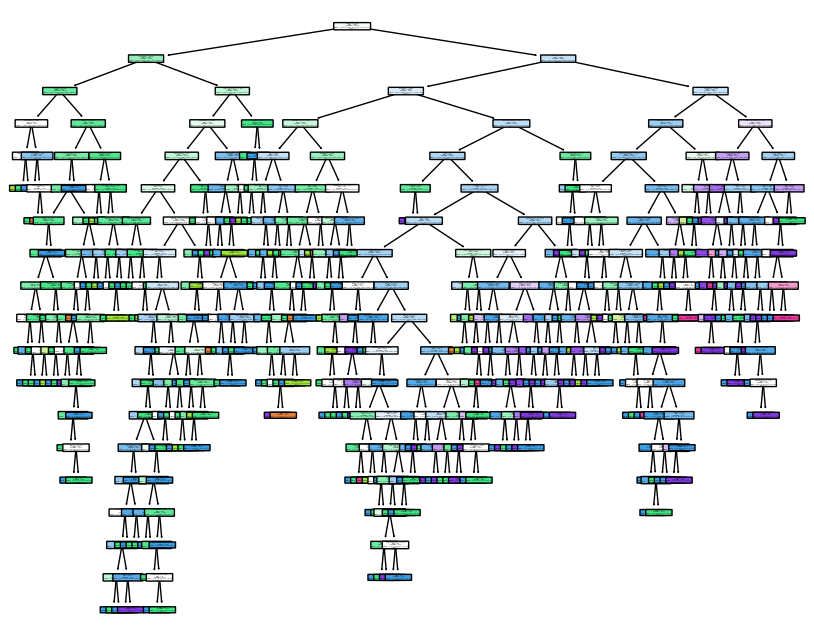

In [ ]:
#Ploting the Decision Tree
plt.figure(figsize=(10, 8))

class_names = list(map(str, dtClassifier.classes_))

plot_tree(dtClassifier,
          feature_names=original_features.columns,
          class_names = class_names,
          rounded=True,
          filled=True,
          proportion=True)


plt.show()

In [ ]:
# Número de nós na árvore
num_nodes = dtClassifier.tree_.node_count

# Altura da árvore
tree_height = dtClassifier.tree_.max_depth

print(f"Número de nós: {num_nodes}")
print(f"Altura da árvore: {tree_height}")

Número de nós: 569
Altura da árvore: 18


In [ ]:
# Predict the labels for the validation set
pred_y_dt = dtClassifier.predict(test_x_ori)

# Calculate Accuracy
accuracy_dt = dtClassifier.score(test_x_ori, test_y_ori)
print("Accuracy:", accuracy_dt)

# Calculate Precision
precision_dt = precision_score(test_y_ori, pred_y_dt, average='macro', zero_division=0)
print('Precision:', precision_dt)

# Calculate F1 Score
f1_dt = f1_score(test_y_ori, pred_y_dt, average='weighted', zero_division=0)
print('F1 Score:', f1_dt)

Accuracy: 0.575
Precision: 0.3916156507547379
F1 Score: 0.5748454630110741


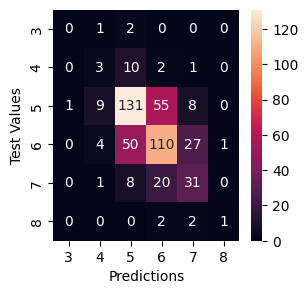

In [ ]:
#Confusion Matrix
confMatDT = confusion_matrix(test_y_ori,pred_y_dt)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT,annot=True,linecolor="red",fmt=".0f",ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

## Árvore de decisão (com parâmetros fixados)

In [ ]:
# Definir os valores dos parâmetros que você deseja testar
param_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_impurity_decrease': [0.0, 0.00001, 0.0001, 0.001, 0.1],
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.000001, 0.00001],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Criar um modelo base
dt = DecisionTreeClassifier(random_state=42)

# Usar RepeatedStratifiedKFold para validação cruzada mais robusta
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Definir a métrica de avaliação como F1-score macro
scoring = make_scorer(f1_score, average='weighted')

# Criar o objeto de busca em grade com validação cruzada
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2, scoring=scoring)

# Executar a busca em grade
grid_search.fit(train_x_ori, train_y_ori)

# Os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# O melhor modelo
best_model = grid_search.best_estimator_

# Imprimir o melhor modelo e os melhores parâmetros
print("Best Model:", best_model)
print("Best Parameters:", best_params)

# Guardar os resultados da busca em grade
results = grid_search.cv_results_



Fitting 15 folds for each of 30240 candidates, totalling 453600 fits


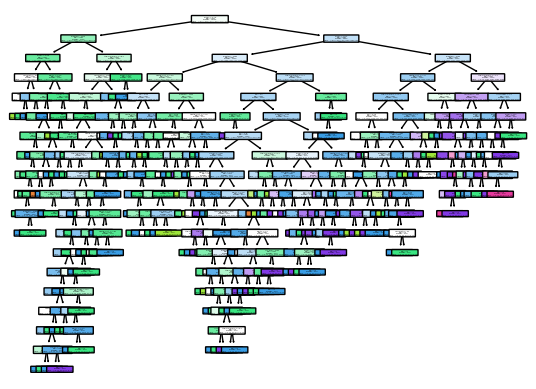

In [ ]:
plot_tree(best_model,
          feature_names=original_features.columns,
          class_names = class_names,
          rounded=True,
          filled=True,
          proportion=True)


plt.show()

In [ ]:
# Obter o melhor modelo treinado
best_model = grid_search.best_estimator_

# Fazer previsões com o melhor modelo no conjunto de validação
predictions = best_model.predict(test_x_ori)

# Calcular Precision
precision = precision_score(test_y_ori, predictions, average='weighted', zero_division=0)
print("Precision:", precision)

# Calcular Recall
recall = recall_score(test_y_ori, predictions, average='weighted', zero_division=0)
print("Recall:", recall)

# Calcular F1-Score
f1 = f1_score(test_y_ori, predictions, average='weighted', zero_division=0)
print("F1-Score:", f1)

Precision: 0.5531400207556705
Recall: 0.5583333333333333
F1-Score: 0.5554351275581036


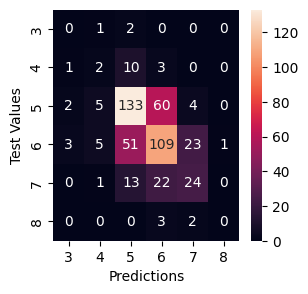

In [ ]:
#Confusion Matrix
confMatDT2 = confusion_matrix(test_y_ori,predictions)

f, ax = plt.subplots(figsize = (3,3))
sns.heatmap(confMatDT2,annot=True,linecolor="red",fmt=".0f",ax=ax, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()

## Naive Bayes (sem parâmetros)
usar o dataframe normalizado

In [ ]:

naive_bayes = GaussianNB()


naive_bayes.fit(train_x_nm, train_y_nm)

# Fazer previsões nos dados de teste
y_pred = naive_bayes.predict(test_x_nm)

# Calcular a acurácia do modelo
accuracy = accuracy_score(test_y_nm, y_pred)
print("Acurácia do modelo Naive Bayes:", accuracy)

## Naive Bayes (com parâmetros fixados)
usar o dataframe normalizado

In [ ]:
priors = None
var_smoothing = 1e-9


naive_bayes = GaussianNB(priors=priors, var_smoothing=var_smoothing)


naive_bayes.fit(train_x_nm, train_y_nm)

# Fazer previsões nos dados de teste
y_pred = naive_bayes.predict(test_x_nm)

# Calcular a acurácia do modelo
accuracy = accuracy_score(test_y_nm, y_pred)
print("Acurácia do modelo Naive Bayes com parâmetros fixados:", accuracy)

f1 = f1_score(test_y_nm, y_pred, average='weighted')
print("F1-score do modelo Naive Bayes:", f1)

precision = precision_score(test_y_nm, y_pred, average='weighted')
print("Precisão do modelo Naive Bayes:", precision)

recall = recall_score(test_y_nm, y_pred, average='weighted')
print("Recall do modelo Naive Bayes:", recall)


#plotagem naive bayes






In [ ]:
# Criar um DataFrame para plotar as métricas
metrics_df = report_df[['precision', 'recall', 'f1-score']].iloc[:-3]

# Plotar as métricas por classe
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar')
plt.title('Precisão, Recall e F1-Score por Classe - Naive Bayes')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

NameError: name 'report_df' is not defined

## KNN
usar o dataframe escalonado

In [ ]:
k_values = list(range(1, 17, 2))
best_f1 = 0
best_k = None
f1_scores = []

#verificando qual melhor k
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x_nm, train_y_nm)

    y_pred_nm = knn.predict(test_x_nm)

    f1 = f1_score(test_y_nm, y_pred_nm, average='weighted')
    f1_scores.append(f1)


    if f1 > best_f1:
        best_f1 = f1
        best_k = k


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x_nm, train_y_nm)
y_pred_nm = knn.predict(test_x_nm)
f1 = f1_score(test_y_nm, y_pred_nm, average='weighted')
print ("melhor resultado", f1)

report = classification_report(test_y_nm, y_pred_nm)
print(report)

melhor resultado 0.6065237535222086
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.12      0.15        16
           5       0.69      0.67      0.68       204
           6       0.60      0.64      0.62       192
           7       0.48      0.53      0.50        60
           8       0.25      0.20      0.22         5

    accuracy                           0.61       480
   macro avg       0.37      0.36      0.36       480
weighted avg       0.60      0.61      0.61       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Desempenho do KNN para difetentes k's



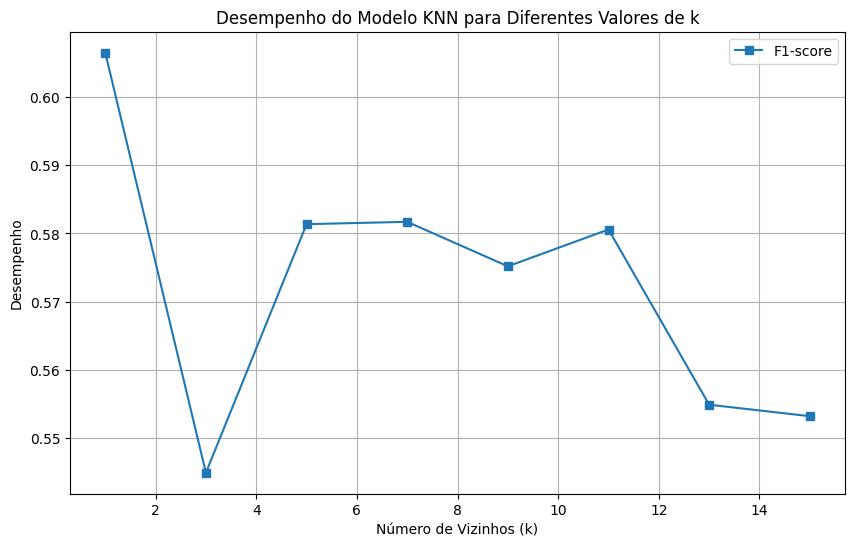

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='s', label='F1-score')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Desempenho')
plt.title('Desempenho do Modelo KNN para Diferentes Valores de k')
plt.legend()
plt.grid(True)
plt.show()

## Matriz de confusão knn

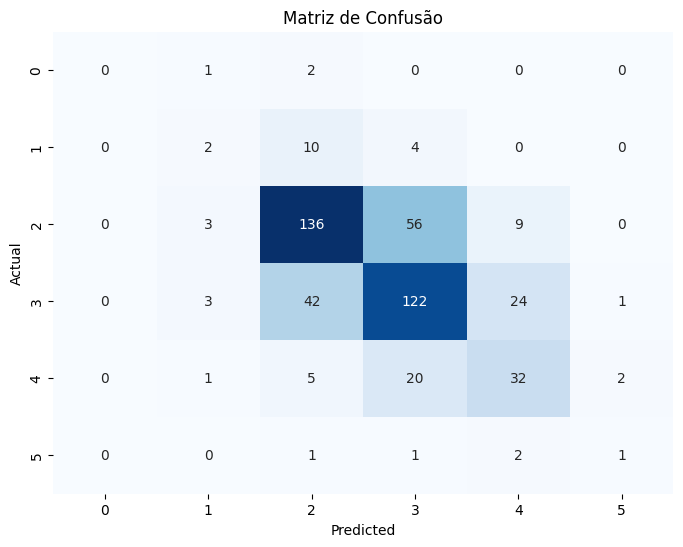

In [ ]:
cm = confusion_matrix(test_y_nm, y_pred_nm)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Regressão logística
usar o dataframe normalizado